In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import scipy.stats


$STEP\ 1$

Read the files generated from kibby python package using the following command line:


```python ${Kibby_Path}/conservation_from_fasta.py $input ${input}_conservation -device cuda```

In [4]:
files=glob.glob("YOU_PATH")


$STEP\ 2$

Define the Conservation score function as defined in the method.

In [5]:
#Define a function to calculate the score

def proportion_greater_than_04(s):
    try:
        numbers = np.array(s.split(), dtype=float)
    except Exception as e:
#         print(f"Error converting string to floats: {e}")
        numbers = np.array([])  # Ensuring `numbers` is defined even if conversion fails
    return np.sum(numbers > 0.4) / len(numbers) if len(numbers) > 0 else 0

$STEP\ 3$

Apply to the Data

In [6]:
data={}
for i in files:
    df=pd.read_csv(i)
    sp=[i.split('species=')[-1].replace('.proteins','') for i in df['header']]
    df['sp']=sp
    df['len']=[len(i) for i in df['sequence']]
    data[i]=df
    data[i]['proportion_gt_04'] = df['conservation'].apply(proportion_greater_than_04)

$STEP\ 4$

Import Expression Data and match them to your genes

In [8]:
Ex_data={}
for i in open('All.expression.data','r').readlines():
    try:
        Ex_data[i.split(',')[0]]=np.array([float(i) for i in i.split(',')[1:]]).mean()
    except:
        pass

In [46]:
single_dp={}
for i in Ex_data_sp:
    single_dp[i]={}
    _={k.split('\t')[0]:v for k,v in zip(data[i].header, data[i].proportion_gt_04)}
    _d={k:v for k,v in Ex_data_sp[i].items() if k in [d for d in _]}
    for k in _d:
        single_dp[i][k]=(_[k],_d[k])

In [9]:
Ex_data_sp={}
for n in data.keys():
    Ex_data_sp[n]={}
    for i in [i.split('\t')[0] for i in data[n]['header']]:
        if any(i for j in ['Sevir','Sobic','Seita','Potri','Pahal','Medtr','Lalb','GmISU01','Eucgr','Bradi'] if j in i):
            if i[-2:] =='.p':
                i='.'.join(i.split('.')[:2])
            if i in Ex_data:
                Ex_data_sp[n][i]=Ex_data[i]
            else:
                Ex_data_sp[n][i]=0
    for i in [i.split('\t')[0] for i in data[n]['header'] if i[:2]=='AT']:
        i=i.split('.')[0]
        if i in Ex_data:
            Ex_data_sp[n][i]=Ex_data[i]
        else:
            Ex_data_sp[n][i]=0
        
                


$STEP\ 5$

Summarise the data per gene family in mean, median, etc. - sort them - and associate them with colours and shapes 

In [1]:
means = []
stds = []
labels = []
sp_counts=[]
length_mean=[]
length_std=[]
Exp=[]
Exp_std=[]
for key, df in data.items():
   
    if key in Ex_data_sp:
        
        _=np.median(np.array(list(Ex_data_sp[key].values())))
        a=np.array([i for i in list(Ex_data_sp[key].values())])
        __=scipy.stats.sem(a)

        Exp_std.append(__)
        Exp.append(_)
        mean = df['proportion_gt_04'].mean()
        std = df['proportion_gt_04'].sem()
        length_mean.append(df['len'].mean())
        length_std.append(df['len'].std())
        sp_count = df['sp'].value_counts().median()#df['sp'].value_counts().std()/df['sp'].value_counts().mean()  # Total count of 'sp' occurrences
        sp_counts.append(sp_count)

        means.append(mean)
        stds.append(std)
        labels.append(key.split('/')[-1].replace('Combined_','').replace('_Prot_conservation',''))



In [51]:
sorted_indices = np.argsort(means)
sorted_means = np.array(means)[sorted_indices]
sorted_stds = np.array(stds)[sorted_indices]
sorted_labels = np.array(labels)[sorted_indices]
sorted_sp_counts=np.array(sp_counts)[sorted_indices]
sorted_length_mean=np.array(length_mean)[sorted_indices]
sorted_length_std=np.array(length_std)[sorted_indices]
sorted_Exp=np.array(Exp)[sorted_indices]
sorted_Exp_sem=np.array(Exp_std)[sorted_indices]

In [113]:
sorted_labels_Class= { 'Cytochrome_P450': 'Secondary Metabolism',
'AP2': 'TF',
'ALL.fasta_conservation': 'Small Signalling Peptides',
'LEA': 'Other',
'hystone_acetilase': 'Other',
'MYB': 'TF',
'Acyl_coa': 'Secondary Metabolism',
'WRKY': 'TF',
'CMPTA': 'TF',
'MADS': 'TF',
'Auxin_Resp_genes': 'Other',
'DICER4': 'Other',
'IDA': 'Small Signalling Peptides',
'myosin': 'Other',
'RML1A': 'Other',
'HSP': 'Other',
'TCP': 'TF',
'WOXs': 'TF',
'calmodulin': 'Other',
'FTSZ': 'Other',
'Ribonuclease_H': 'Other',
'Storekeeper': 'TF',
'Scarecrow_like': 'TF',
'Phloem_prot': 'Structural',
'YABBY': 'TF',
'AT_hook': 'TF',
'AGOs': 'Other',
'Histone_methyl_tranf': 'Other',
'ferritin': 'Structural',
'QRT3': 'Structural',
'Phosphomutase': 'Core Metabolism',
'RALF': 'Small Signalling Peptides',
'DNA_damage': 'Other',
'sucrose_synthase': 'Core Metabolism',
'LOGs': 'Core Metabolism',
'actin': 'Structural',
'ubiquitin_Prot.ems.conservation': 'Structural',
'ubiquitin': 'Structural',
'ketoacyl_coa': 'Core Metabolism',
'Glycerol_3_phosphate_acyltransferase': 'Core Metabolism',
'enolase': 'Core Metabolism',
'xylose_isomarase': 'Core Metabolism',
'ATP_synthase': 'Core Metabolism',
    'rac_conservation': 'Secondary Metabolism',
                    'rac':'rac_conservation',
 'Prefoldin_conservation':'Structural',
                      
 'metallophosphoesterase_conservation': 'Secondary Metabolism',
 'GDSL_esterase_conservation': 'Secondary Metabolism',
 'Farnesylcysteine_lyase_conservation': 'Core Metabolism',
 'SAM_methyltransferases_conservation': 'Core Metabolism',
 'helicase_conservation':'Structural',
 'acetyltransferase_NATA_conservation': 'Other',
 'Branchpoint_bridging_conservation': 'Core Metabolism',
 'ferrodoxin_conservation': 'Core Metabolism',
 'popyl_isomerase_conservation': 'Core Metabolism',
 'Ornithine_conservation':'Structural',
 'PSF3_conservation':'Structural',
                      'conservation':'Small Signalling Peptides',
 'Phosphoglycerate_kinase_conservation': 'Core Metabolism',
 'citrate_synthase_conservation': 'Core Metabolism',
 'Ribosomal_prot_conservation':'Structural',
'starch_synthase_conservation':'Core Metabolism',
'tocopherol_transferase_conservation':'Core Metabolism',
                     'Diaminopimelate_epimerase_conservation':'Other'}

In [114]:
sp_to_class={d:(sorted_labels_Class[[k for k in sorted_labels_Class if d.split('/')[-1].split('_')[1].replace('_conservation', '') in k][0]] if len([k for k in sorted_labels_Class if d.split('/')[-1].split('_')[1].replace('_conservation', '') in k])>0 else None) for d in single_dp.keys()}

In [116]:
shapes = {
    'Other': 'h',  # circle
    'Small Signalling Peptides': 'o',  # square
    'Structural': '^',  # triangle_up
    'Secondary Metabolism': 'D',  # diamond
    'Core Metabolism': 'p',  # pentagon
    'TF': 's'  # hexagon
}

In [58]:
sorted_labels_mapped = np.array([sorted_labels_Class[label] for label in sorted_labels])


In [59]:
_={i:[] for i in sorted_labels_mapped}
for i,j in zip(sorted_Exp,sorted_labels_mapped):
    _[j].append(i)
sorted_labels_mapped_ex={k:np.array(v).mean() for k,v in _.items()}

In [61]:
unique_classes = np.unique(sorted_labels_mapped)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))
color_map = {'Other': '#436B95',
    'Small Signalling Peptides': '#cc3333',
    'Structural': 'purple',
    'Secondary Metabolism': '#93C572',
    # Assigning general colors for the rest
    'Core Metabolism': '#043927',#'#FDBE02',
    'TF': 'orange'
    
}

# Default color for categories not explicitly defined above
default_color = 'grey'

In [62]:
sorted_labels_colors = np.array([color_map.get(label, default_color) for label in sorted_labels_mapped])


In [237]:
cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue", ['#CDE1EC', '#2066A8'])
norm = plt.Normalize(min(sorted_labels_mapped_ex.values()), max(sorted_labels_mapped_ex.values()))


In [238]:
rgba_tuple = mcolors.to_rgba('#D47264')
Xs=[vv[0] for l,v in single_dp.items() for KK,vv in v.items() ]
Ys=[vv[1] for l,v in single_dp.items() for KK,vv in v.items() ]
Ss=[shapes[sp_to_class[l]] for l,v in single_dp.items() for KK,vv in v.items() ]
Cs=[rgba_tuple if 'CLES' in l else cmap(norm(sorted_labels_mapped_ex[sp_to_class[l]])) for l,v in single_dp.items() for KK,vv in v.items() ]

In [248]:
color_intensity = [-999 if c == rgba_tuple else sum(c[:3])/3 for c in Cs]  # Negative for reverse sort
sorted_indices = sorted(range(len(color_intensity)), key=lambda k: color_intensity[k])

# Reorder all lists based on these indices
Xs = [Xs[i] for i in sorted_indices][::-1]
Ys = [Ys[i] for i in sorted_indices][::-1]
Ss = [Ss[i] for i in sorted_indices][::-1]
Cs = [Cs[i] for i in sorted_indices][::-1]

$STEP\ 6$

Plotting

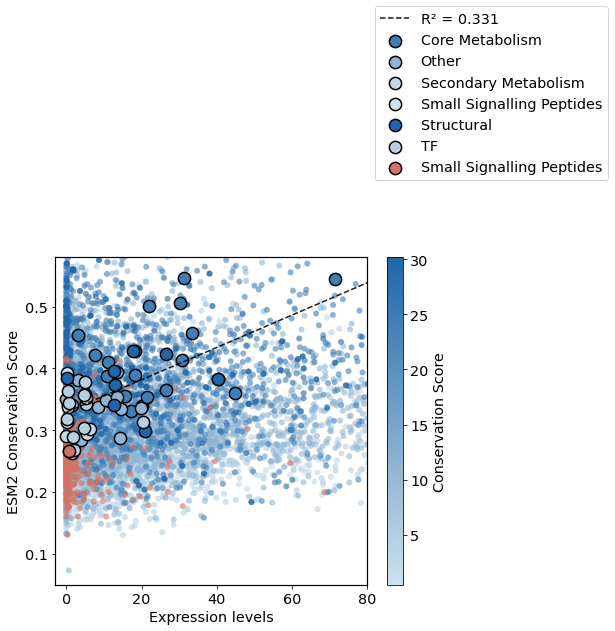

In [261]:
import scipy.stats as stats


shapes = {
    'Other': 'h',
    'Small Signalling Peptides': 'o',
    'Structural': '^',
    'Secondary Metabolism': 'D',
    'Core Metabolism': 'p',
    'TF': 's'
}

# Create the plot
plt.figure(figsize=(6.5, 5.5))

# Plot scatter points
plt.scatter(Ys, Xs, c=Cs, alpha=.6, edgecolors='lightgrey', linewidths=.015)

# Add correlation line
slope, intercept, r_value, p_value, std_err = stats.linregress( sorted_Exp[:-2],sorted_means[:-2])
line_x = np.array([min(Ys), max(Ys)])
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, 'k--', alpha=0.9, label=f'R² = {r_value**2:.3f}')

# Plot each category with its specific color and shape
for label in np.unique(sorted_labels_mapped):
    if label in shapes:
        idx = np.where(sorted_labels_mapped == label)
        plt.scatter(sorted_Exp[idx], sorted_means[idx], s=150, 
                    color=cmap(norm(sorted_labels_mapped_ex[label])), 
                     label=label,
                    edgecolors='black', linewidths=1.5)

for n,label in enumerate(sorted_labels_mapped):
    if n == [n for n,i in enumerate(sorted_labels) if i=='ALL.fasta_conservation'][0]:
        plt.scatter(sorted_Exp[n], sorted_means[n], s=150, 
                    color='#D47264', 
                   label=label,
                    edgecolors='black', linewidths=1.5)

plt.legend(frameon=True, facecolor='white', edgecolor='none', fontsize='large')
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.2)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.set_label('Conservation Score')

plt.xlim(-3,80)
plt.ylim(0.05,0.58)
plt.xlabel('Expression levels')
plt.ylabel('ESM2 Conservation Score')
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 1.5))
plt.savefig('./Conservation_rate_Extended_FULL.pdf', bbox_inches='tight')

plt.show()